## Model Ensembling by Voting

### Import Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter
sns.set_context("talk")
style.use('fivethirtyeight')
from scipy import stats
from tqdm import tqdm_notebook as tqdm
import os

### Load Files

In [2]:
# load submission files
submit = pd.read_csv("../input/liverpool-ion-switching/sample_submission.csv")

# decent public kernels from Kaggle
paths = {
    "wavenet1": "submission_118.csv",
    "wavenet2": "submission_136.csv",
    "wavenet3": "submission_127.csv",
    "wavenet4": "submission_121.csv",
    "wavenet5": "test.csv",
}

# better model recieves higher weight
weights = np.array([1,1.5,1.2,1.0,3.3]) 

subs = submit.copy()
for i, p in enumerate(paths.keys()):
    tmp = pd.read_csv(paths[p])
    print(p)
    subs[f"{p}"] = tmp["open_channels"]

subs.drop(columns=["time", "open_channels"], inplace=True)

wavenet1
wavenet2
wavenet3
wavenet4
wavenet5


### Correlation Analysis 

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

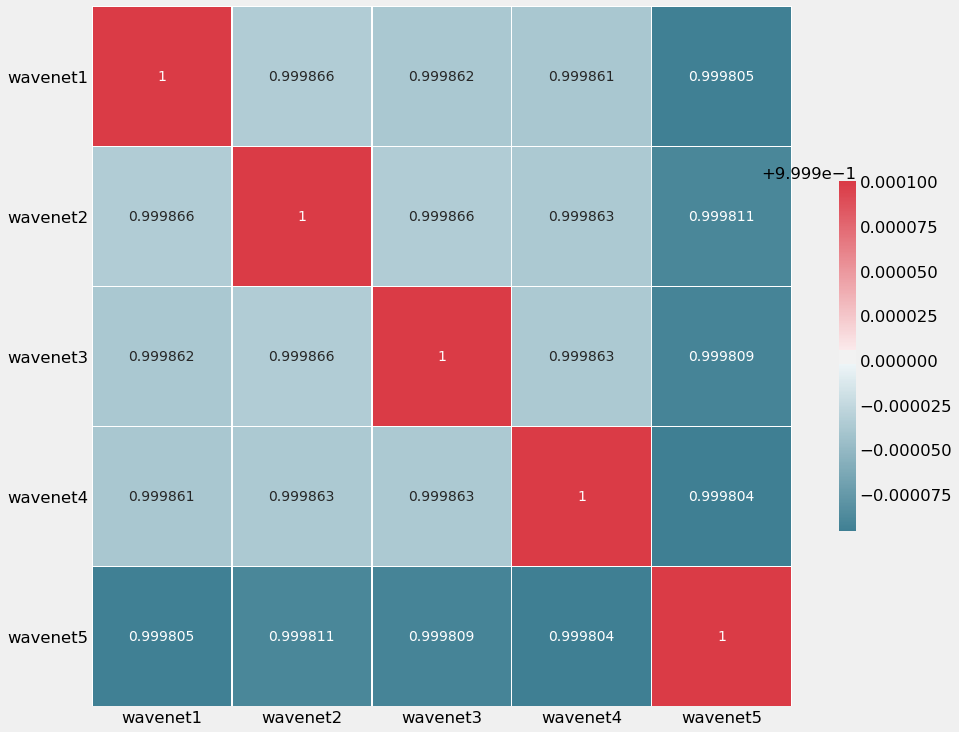

In [3]:
# compute the correlation matrix
corr = subs.corr()

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=True, fmt="g",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set_ylim(corr.shape[0], 0)
plt.yticks(rotation=0)

### Weighted Voting

In [4]:
def weighted_voting(row):
    h = np.histogram(row.values, weights=weights)
    return np.round(h[1][np.argmax(h[0])])

In [5]:
submit["open_channels"] = subs.apply(weighted_voting, axis=1)

### Save Data

In [6]:
submit["open_channels"] = submit["open_channels"].astype(int)

submit.to_csv('submission.csv', index=False, float_format='%.4f')